In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import InMemorySaver
from dotenv import load_dotenv

In [2]:
load_dotenv()

llm  = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [3]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str
    

In [4]:
def generate_joke(state: JokeState):
    prompt = f"Generate a joke on the topic {state['topic']}."
    response = llm.invoke(prompt).content
    
    return {"joke": response}

In [5]:
def generate_explanation(state: JokeState):
    prompt = f"Write an explanation for the joke: {state['joke']}."
    response = llm.invoke(prompt).content
    
    return {"explanation": response}

In [6]:
graph = StateGraph(JokeState)

#add nodes
graph.add_node("generate_joke", generate_joke)
graph.add_node("generate_explanation", generate_explanation)

#add edges
graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "generate_explanation")
graph.add_edge("generate_explanation", END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)


In [7]:
config1 = {"configurable":{"thread_id": "1"}}
workflow.invoke({"topic":"Pizza"}, config=config1)

{'topic': 'Pizza',
 'joke': "Why does the pizza slice like the mushroom so much?\n\nBecause he's a fungi!",
 'explanation': 'This is a pun, relying on the similar sound of "fun guy" and "fungi."\n\n* **"Fun guy"** is a colloquial term for a fun person.\n* **"Fungi"** is the plural of fungus, a type of organism including mushrooms.\n\nThe joke plays on the double meaning of "fungi."  The pizza slice "likes" the mushroom because the mushroom is a fungi, and the sound is similar to saying the mushroom is a "fun guy," implying a friendly and enjoyable relationship.'}

In [8]:
workflow.get_state(config=config1)


StateSnapshot(values={'topic': 'Pizza', 'joke': "Why does the pizza slice like the mushroom so much?\n\nBecause he's a fungi!", 'explanation': 'This is a pun, relying on the similar sound of "fun guy" and "fungi."\n\n* **"Fun guy"** is a colloquial term for a fun person.\n* **"Fungi"** is the plural of fungus, a type of organism including mushrooms.\n\nThe joke plays on the double meaning of "fungi."  The pizza slice "likes" the mushroom because the mushroom is a fungi, and the sound is similar to saying the mushroom is a "fun guy," implying a friendly and enjoyable relationship.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029b-d847-64ce-8002-42a4077f3308'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T05:21:42.402931+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029b-c868-662b-8001-5d58daf4fb4c'}}, tasks=(), interrupts=())

In [23]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'Pizza', 'joke': "Why does the pizza slice like the mushroom so much?\n\nBecause he's a fungi!", 'explanation': 'This is a pun, relying on the similar sound of "fun guy" and "fungi."\n\n* **"Fun guy"** is a colloquial term for a fun person.\n* **"Fungi"** is the plural of fungus, a type of organism including mushrooms.\n\nThe joke plays on the double meaning of "fungi."  The pizza slice "likes" the mushroom because the mushroom is a fungi, and the sound is similar to saying the mushroom is a "fun guy," implying a friendly and enjoyable relationship.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029b-d847-64ce-8002-42a4077f3308'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T05:21:42.402931+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029b-c868-662b-8001-5d58daf4fb4c'}}, tasks=(), interrupts=()),
 

In [10]:
config2 = {"configurable":{"thread_id": "2"}}
workflow.invoke({"topic":"Pasta"}, config=config2)

{'topic': 'Pasta',
 'joke': "Why did the Italian chef quit his job?  Because he didn't get enough *pasta*bilities!",
 'explanation': 'The joke plays on the double meaning of "pasta-bilities."\n\n* **Pasta-bilities (literal):** Refers to the various types of pasta dishes an Italian chef could create.  A chef would have many opportunities (possibilities) to showcase their culinary skills with pasta.\n\n* **Possibilities (figurative):**  This is the intended meaning within the context of quitting a job. The chef felt there weren\'t enough opportunities for growth, creativity, or advancement in their current position.\n\nThe humor comes from the unexpected, pun-based shift from the literal meaning related to pasta to the figurative meaning of career opportunities.  It\'s a wordplay joke that relies on the similar sound and the relevant context of an Italian chef\'s work.'}

In [11]:
workflow.get_state(config=config2)


StateSnapshot(values={'topic': 'Pasta', 'joke': "Why did the Italian chef quit his job?  Because he didn't get enough *pasta*bilities!", 'explanation': 'The joke plays on the double meaning of "pasta-bilities."\n\n* **Pasta-bilities (literal):** Refers to the various types of pasta dishes an Italian chef could create.  A chef would have many opportunities (possibilities) to showcase their culinary skills with pasta.\n\n* **Possibilities (figurative):**  This is the intended meaning within the context of quitting a job. The chef felt there weren\'t enough opportunities for growth, creativity, or advancement in their current position.\n\nThe humor comes from the unexpected, pun-based shift from the literal meaning related to pasta to the figurative meaning of career opportunities.  It\'s a wordplay joke that relies on the similar sound and the relevant context of an Italian chef\'s work.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f07029

In [12]:
list(workflow.get_state_history(config=config2))

[StateSnapshot(values={'topic': 'Pasta', 'joke': "Why did the Italian chef quit his job?  Because he didn't get enough *pasta*bilities!", 'explanation': 'The joke plays on the double meaning of "pasta-bilities."\n\n* **Pasta-bilities (literal):** Refers to the various types of pasta dishes an Italian chef could create.  A chef would have many opportunities (possibilities) to showcase their culinary skills with pasta.\n\n* **Possibilities (figurative):**  This is the intended meaning within the context of quitting a job. The chef felt there weren\'t enough opportunities for growth, creativity, or advancement in their current position.\n\nThe humor comes from the unexpected, pun-based shift from the literal meaning related to pasta to the figurative meaning of career opportunities.  It\'s a wordplay joke that relies on the similar sound and the relevant context of an Italian chef\'s work.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0702

# Fault tolerance

In [13]:
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph import StateGraph, START, END
import time

In [14]:
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str
    

In [15]:
def step_1(state: CrashState):
    print("Step 1 executed")
    return {"step1": "Step 1 completed"}

def step_2(state: CrashState):
    print("Step 2 hanging... now manually interrupt from the notebook toolbar(STOP button)")
    time.sleep(30) #simulating long running task
    return {"step2": "Step 2 completed"}

def step_3(state: CrashState):
    print("Step 3 executed")
    return {"step3": "Step 3 completed"}

In [16]:
builder = StateGraph(CrashState)

#add nodes
builder.add_node("step_1",step_1)
builder.add_node("step_2",step_2)
builder.add_node("step_3",step_3)

#add edges
builder.add_edge(START, "step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()

graph = builder.compile(checkpointer=checkpointer)



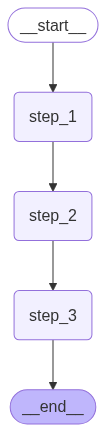

In [17]:
graph

In [18]:
try:
    print("Running graph: Please manually interrupt during step 2...")
    graph.invoke({"input": "start"}, config={"configurable":{"thread_id": "thread-1"}})
except KeyboardInterrupt:
    print("Kernel manually interrupted (crash simulated)")

Running graph: Please manually interrupt during step 2...
Step 1 executed
Step 2 hanging... now manually interrupt from the notebook toolbar(STOP button)
Kernel manually interrupted (crash simulated)


In [19]:
graph.get_state({"configurable":{"thread_id": "thread-1"}})

StateSnapshot(values={'input': 'start', 'step1': 'Step 1 completed'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029b-f9c7-6dfb-8001-4fe93fc6fcbe'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-03T05:21:45.915928+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029b-f9c3-6747-8000-85eb3e3511e9'}}, tasks=(PregelTask(id='9d41d3fe-e4ee-7d61-f416-88f048da7552', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [20]:
list(graph.get_state_history({"configurable":{"thread_id": "thread-1"}}))

[StateSnapshot(values={'input': 'start', 'step1': 'Step 1 completed'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029b-f9c7-6dfb-8001-4fe93fc6fcbe'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-03T05:21:45.915928+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029b-f9c3-6747-8000-85eb3e3511e9'}}, tasks=(PregelTask(id='9d41d3fe-e4ee-7d61-f416-88f048da7552', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029b-f9c3-6747-8000-85eb3e3511e9'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-03T05:21:45.914100+00:00', parent_config={'con

In [21]:
#resume the graph

fial_state  = graph.invoke(None, config={"configurable":{"thread_id": "thread-1"}})

Step 2 hanging... now manually interrupt from the notebook toolbar(STOP button)
Step 3 executed


In [22]:
list(graph.get_state_history({"configurable":{"thread_id": "thread-1"}}))

[StateSnapshot(values={'input': 'start', 'step1': 'Step 1 completed', 'step2': 'Step 2 completed', 'step3': 'Step 3 completed'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029e-87ca-6cfb-8003-f31a1a48a866'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-03T05:22:54.494009+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029e-87c8-653b-8002-9b3b20677211'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'Step 1 completed', 'step2': 'Step 2 completed'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029e-87c8-653b-8002-9b3b20677211'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-03T05:22:54.492982+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoin

# Human In The Loop (SKIP for now)

# Time Travel

In [26]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'Samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0702a9-f165-6f71-8001-71b2018f1b85'}}, metadata={'source': 'update', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T05:28:00.846591+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029b-c153-6361-8000-8fb9b076934a'}}, tasks=(PregelTask(id='349b8ee4-7055-13f5-9bc9-210fc2c2db83', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'Pizza', 'joke': "Why does the pizza slice like the mushroom so much?\n\nBecause he's a fungi!", 'explanation': 'This is a pun, relying on the similar sound of "fun guy" and "fungi."\n\n* **"Fun guy"** is a colloquial term for a fun person.\n* **"Fungi"** is the plural of fungus, a type of organism including mushrooms.\n\nThe jo

In [25]:
# update state
workflow.update_state({'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07029b-c153-6361-8000-8fb9b076934a'}}, {"topic": "Samosa"})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0702a9-f165-6f71-8001-71b2018f1b85'}}

In [27]:
workflow.invoke(None, {'configurable': {'thread_id': '1', 'checkpoint_id': '1f0702a9-f165-6f71-8001-71b2018f1b85'}})

{'topic': 'Samosa',
 'joke': 'Why did the Samosa get a bad grade in school?\n\nBecause it was always *half-baked*!',
 'explanation': 'The joke plays on the double meaning of "half-baked."\n\n* **Literal meaning:**  A samosa is a fried or baked pastry.  "Half-baked" literally means it wasn\'t cooked properly.\n\n* **Figurative meaning:** "Half-baked" also means poorly planned, underdeveloped, or incomplete.  This is used to describe someone\'s ideas or work.\n\nThe humor comes from the unexpected connection between the literal undercooked state of the samosa and the figurative meaning of lacking completeness in schoolwork.  The samosa\'s bad grade is a pun, suggesting its culinary state is the reason for its academic failure.'}

In [28]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'Samosa', 'joke': 'Why did the Samosa get a bad grade in school?\n\nBecause it was always *half-baked*!', 'explanation': 'The joke plays on the double meaning of "half-baked."\n\n* **Literal meaning:**  A samosa is a fried or baked pastry.  "Half-baked" literally means it wasn\'t cooked properly.\n\n* **Figurative meaning:** "Half-baked" also means poorly planned, underdeveloped, or incomplete.  This is used to describe someone\'s ideas or work.\n\nThe humor comes from the unexpected connection between the literal undercooked state of the samosa and the figurative meaning of lacking completeness in schoolwork.  The samosa\'s bad grade is a pun, suggesting its culinary state is the reason for its academic failure.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0702ad-1ac3-62eb-8003-c226555d1b9d'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T05:29:25.71457